In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


sales_data=pd.read_csv('C:\\Users\Paarth K\PycharmProjects\sales_data.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
sales_data.info() #checking data frame information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 4.3+ MB


In [4]:
sales_data.isnull().values.any() #checking all data if there is any null values 
sales_data.isnull().sum() #checking each column for null values (counts all true values)
sales_data=sales_data.dropna() #removes all null values from all data

In [5]:
sales_data.isnull().values.any() #Check for null value (Test)

False

In [6]:
#remove string from row  

sales_data=sales_data[sales_data['Quantity Ordered'].str[0:2]!="Qu"] #if the first 2 letters in column is "qu" exclude entire row from data

In [7]:
#Turn str into int64

sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])
sales_data['Price Each']= pd.to_numeric(sales_data['Price Each'])

In [8]:
#convert month and year from date format MDY Format

sales_data["Month"]=pd.to_datetime(sales_data['Order Date']).dt.month 
sales_data["Year"]=pd.to_datetime(sales_data['Order Date']).dt.year

In [9]:
#converting month into int32

type(sales_data["Month"].iloc[0]) #month dtype=str
sales_data["Month"]=pd.to_numeric(sales_data["Month"]) 
type(sales_data["Month"].iloc[0])#month dtype=int64
sales_data["Month"]=sales_data["Month"].astype('int32') #month dtype=int32

In [10]:
#info about data 
type(sales_data["Month"].iloc[0])
sales_data['Year'].value_counts() #unique values for Year column
type(sales_data["Quantity Ordered"].iloc[0]) #Check Dtype (Test)

numpy.int64

In [11]:
#extracting state from purchase address

sales_data["State"]=sales_data['Purchase Address'].str.split(', ').str[2] #extract state
sales_data["State"]=sales_data["State"].str.split(' ').str[0] #chose only the state part not postal code
sales_data["State"]=sales_data["State"].str.strip() #remove blank spaces around string

In [12]:
#extracting city from purchase adress

sales_data["City"]=sales_data['Purchase Address'].str.split(', ').str[1] #extract city
sales_data["City"]=sales_data["City"].str.strip() #remove blank spaces around string

In [13]:
#extracting city and state from purchase adress

def city(address):
    return address.split(',')[1].strip() #take city from adress and remove space
def state(address):
    return address.split(',')[2].split(' ')[1] #take state from address and remove zip code and white space

In [14]:
#Applying both previous functions with 1 .apply()

sales_data["Location"]=sales_data["Purchase Address"].apply(lambda x:f"{city(x)} ({state(x)})") #using lambda and apply, we use f to combine strings 

#the curly bracket{} is for the variable string and the () is for static string

In [15]:
#Creating a Sales Column

sales_data["Total Sales $"]=sales_data['Price Each']*sales_data["Quantity Ordered"] #total saler= price times quantity

#type(sales_data["Total Sales $"].iloc[0])

In [16]:
#Creating comlumns with hour and date of orders

sales_data["Hour"]=pd.to_datetime(sales_data['Order Date']).dt.hour
sales_data["Minute"]=pd.to_datetime(sales_data['Order Date']).dt.minute
sales_data["Count"]= 1

In [17]:
sales_data.head(25)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,State,City,Location,Total Sales $,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,TX,Dallas,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,MA,Boston,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.99,9,27,1
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,2019,CA,San Francisco,San Francisco (CA),11.95,13,3,1
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,2019,WA,Seattle,Seattle (WA),99.99,7,46,1
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,2019,GA,Atlanta,Atlanta (GA),11.95,10,58,1
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,2019,CA,San Francisco,San Francisco (CA),1700.00,10,38,1
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,2019,MA,Boston,Boston (MA),11.99,14,5,1


In [18]:
# find the best month for sales

sales_data.groupby('Month')['Total Sales $'].sum() #finds total sales sum of each month

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total Sales $, dtype: float64

In [19]:
#get all different month values as keys to put into a list (for index numbers)
keys=[]
for month,df in sales_data.groupby('Month'):
    keys.append(month)

print(keys)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [20]:
#Get the y values from datafram
y=sales_data.groupby('Month')["Total Sales $"].sum()/1000000

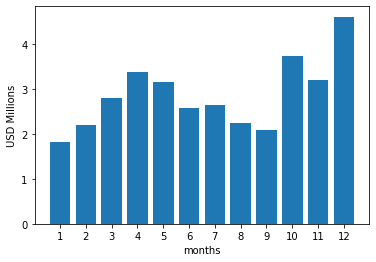

In [21]:
#graph months and total sales

plt.bar(keys,y)
plt.xticks(keys) #to show all values of keys list 
plt.xlabel("months")
plt.ylabel("USD Millions")

plt.show()

In [22]:
sales_data.groupby('City')["Total Sales $"].sum()

City
Atlanta          2.795499e+06
Austin           1.819582e+06
Boston           3.661642e+06
Dallas           2.767975e+06
Los Angeles      5.452571e+06
New York City    4.664317e+06
Portland         2.320491e+06
San Francisco    8.262204e+06
Seattle          2.747755e+06
Name: Total Sales $, dtype: float64

In [23]:
#creating x and y values for city and total sales
x=[]
for city,df in sales_data.groupby("City"):
    x.append(city)
y=sales_data.groupby('City')["Total Sales $"].sum()/1000000


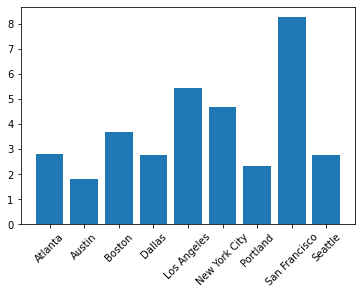

In [24]:
plt.bar(x,y)
plt.xticks(x,rotation=45) #rotate the x label 

plt.show()

In [25]:
#Which time is best for advirtesments
x=[]
for time,df in sales_data.groupby("Hour"):
    x.append(time)

y=sales_data.groupby('Hour')["Count"].sum()

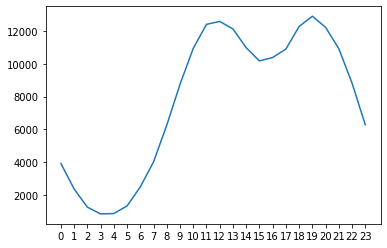

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,State,City,Location,Total Sales $,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019,TX,Dallas,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019,MA,Boston,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.99,9,27,1


In [26]:
plt.plot(x,y)
plt.xticks(x)

plt.show()

sales_data.head()

In [40]:
#Finding duplicate in the DF
sales_data['Order ID'].value_counts().head(10) #find unique duplicate ID's
sales_data["Order ID"].duplicated().sum() #find total duplicated values

df_orderID=sales_data[sales_data['Order ID'].duplicated(keep=False)]  #keep false means keeps all occurance duplicates
df_orderID #all order ID with duplicates 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,State,City,Location,Total Sales $,Hour,Minute,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.99,14,38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),600.00,19,42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.95,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,2019,MA,Boston,Boston (MA),99.99,11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,2019,GA,Atlanta,Atlanta (GA),3.84,20,18,1
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,2019,GA,Atlanta,Atlanta (GA),11.99,0,25,1
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,2019,GA,Atlanta,Atlanta (GA),5.98,0,25,1
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,2019,CA,San Francisco,San Francisco (CA),600.00,13,49,1


In [47]:
#find most frequent products bought together

df_orderID["Grouped"]=df_orderID.groupby('Order ID')["Product"].transform(lambda x:','.join(x))  #loops through different products of same Order ID and combine them #.transfrom is apply of entire DF
df_orderID.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,State,City,Location,Total Sales $,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,2019,CA,Los Angeles,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,2019,MA,Boston,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,2019,MA,Boston,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,2019,CA,San Francisco,San Francisco (CA),5.98,17,0,1,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,2019,CA,San Francisco,San Francisco (CA),600.00,17,0,1,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,2019,NY,New York City,New York City (NY),14.95,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,2019,NY,New York City,New York City (NY),11.95,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


In [46]:
#find unique pairs in Grouped Columns
from collections import Counter   
from itertools import combinations #makes unique pairs 

count=Counter()

for i in df_orderID['Grouped']:
    row_list=i.split(',') #splits grouped by , to identify each product
    count.update(Counter(combinations(row_list,2))) #add values in counter 
    #makes pair combnations (if more than 2 values present, it makes more combintations) 2 indicates how many entries to group
count.most_common(10) #sorting for counter

[(('iPhone', 'Lightning Charging Cable'), 2140),
 (('Google Phone', 'USB-C Charging Cable'), 2116),
 (('iPhone', 'Wired Headphones'), 987),
 (('Google Phone', 'Wired Headphones'), 949),
 (('iPhone', 'Apple Airpods Headphones'), 799),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 773),
 (('Google Phone', 'Bose SoundSport Headphones'), 503),
 (('USB-C Charging Cable', 'Wired Headphones'), 452),
 (('Vareebadd Phone', 'Wired Headphones'), 327),
 (('Lightning Charging Cable', 'Wired Headphones'), 253)]

In [50]:
#make data in bar graph

Product_pair=[]
frequency=[]

for key,value in count.most_common(10): #make keys and values from the list of tupples (above data)
    Product_pair.append(key) #assign keys to product_pair 
    frequency.append(value) #assign values to frequency 

plt.bar(Product_pair,frequency)


plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [52]:
frequency
Product_pair

[('iPhone', 'Lightning Charging Cable'),
 ('Google Phone', 'USB-C Charging Cable'),
 ('iPhone', 'Wired Headphones'),
 ('Google Phone', 'Wired Headphones'),
 ('iPhone', 'Apple Airpods Headphones'),
 ('Vareebadd Phone', 'USB-C Charging Cable'),
 ('Google Phone', 'Bose SoundSport Headphones'),
 ('USB-C Charging Cable', 'Wired Headphones'),
 ('Vareebadd Phone', 'Wired Headphones'),
 ('Lightning Charging Cable', 'Wired Headphones')]